In [ ]:
# Student Performance Data Project Analysis

In [9]:
import pandas as pd

# Load the dataset
file_path = "/Users/willi/Documents/ThinkStats2/Student_performance_data _.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


(None,
    StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
 0       1001   17       1          0                  2        19.833723   
 1       1002   18       0          0                  1        15.408756   
 2       1003   15       0          2                  3         4.210570   
 3       1004   17       1          0                  3        10.028829   
 4       1005   17       1          0                  2         4.672495   
 
    Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
 0         7         1                2                0       0      1   
 1         0         0                1                0       0      0   
 2        26         0                2                0       0      0   
 3        14         0                3                1       0      0   
 4        17         1                3                0       0      0   
 
    Volunteering       GPA  GradeClass  
 0             0  2.929196         2

In [11]:
# Selecting 5 key variables for analysis
selected_variables = ['StudyTimeWeekly', 'Absences', 'ParentalEducation', 'ParentalSupport', 'GPA']
data = df[selected_variables]

# Display summary statistics
data.describe()

,StudyTimeWeekly,Absences,ParentalEducation,ParentalSupport,GPA
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,9.771992,14.541388,1.746237,2.122074,1.906186
std,5.652774,8.467417,1.000411,1.122813,0.915156
min,0.001057,0.000000,0.000000,0.000000,0.000000
25%,5.043079,7.000000,1.000000,1.000000,1.174803
50%,9.705363,15.000000,2.000000,2.000000,1.893393
75%,14.408410,22.000000,2.000000,3.000000,2.622216
max,19.978094,29.000000,4.000000,4.000000,4.000000


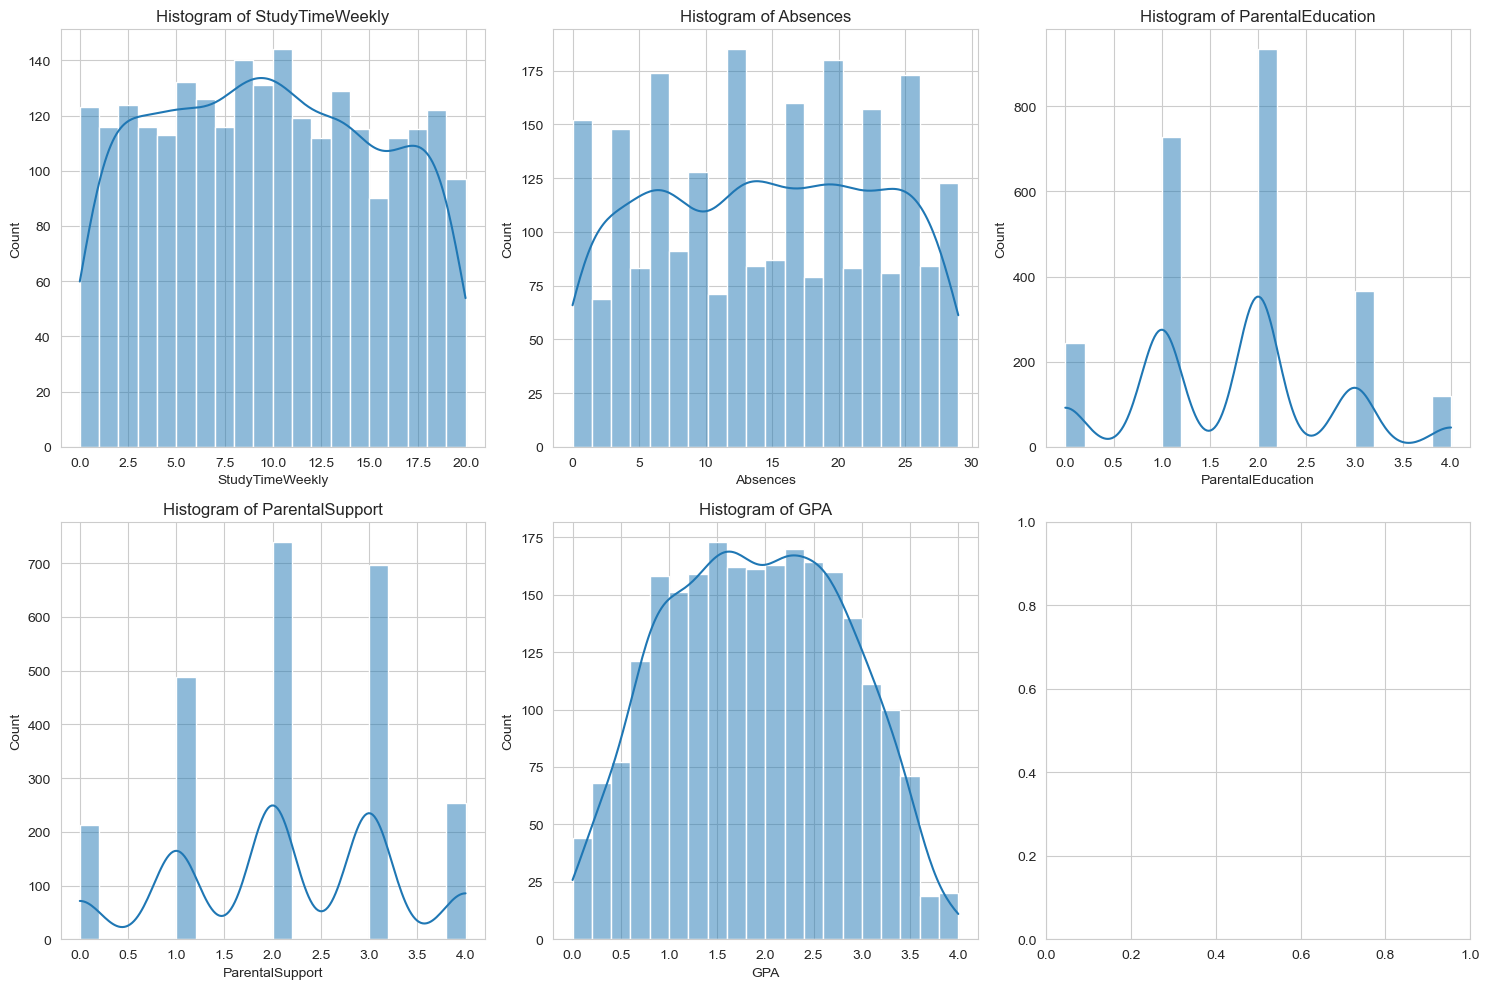

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Generate histograms for selected variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    sns.histplot(data[var], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {var}')

plt.tight_layout()
plt.show()

In [15]:
# Identifying outliers using IQR method
outliers = {}

for var in selected_variables:
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[var] = data[(data[var] < lower_bound) | (data[var] > upper_bound)][var]

# Display outliers count
outlier_counts = {var: len(outliers[var]) for var in selected_variables}
outlier_counts


{'StudyTimeWeekly': 0,
 'Absences': 0,
 'ParentalEducation': 120,
 'ParentalSupport': 0,
 'GPA': 0}

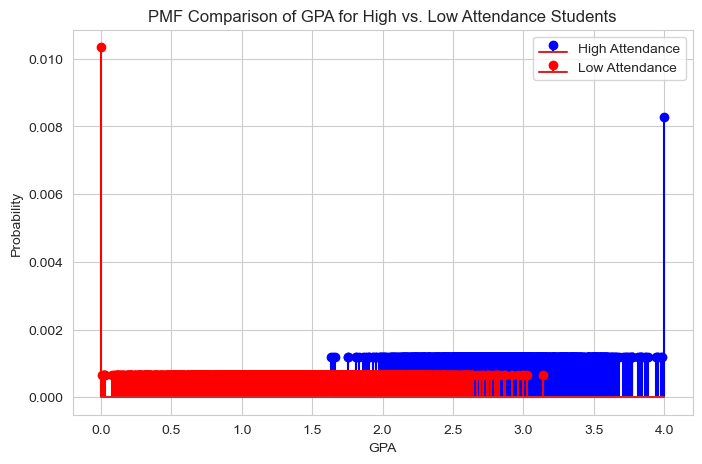

In [17]:
import numpy as np

# Define attendance threshold (High: <=10 absences, Low: >10 absences)
high_attendance = data[data['Absences'] <= 10]['GPA']
low_attendance = data[data['Absences'] > 10]['GPA']

# Compute PMFs
high_attendance_pmf = high_attendance.value_counts(normalize=True).sort_index()
low_attendance_pmf = low_attendance.value_counts(normalize=True).sort_index()

# Plot PMF comparison
plt.figure(figsize=(8,5))
plt.stem(high_attendance_pmf.index, high_attendance_pmf.values, markerfmt='bo', linefmt='b-', label='High Attendance')
plt.stem(low_attendance_pmf.index, low_attendance_pmf.values, markerfmt='ro', linefmt='r-', label='Low Attendance')
plt.xlabel("GPA")
plt.ylabel("Probability")
plt.title("PMF Comparison of GPA for High vs. Low Attendance Students")
plt.legend()
plt.show()

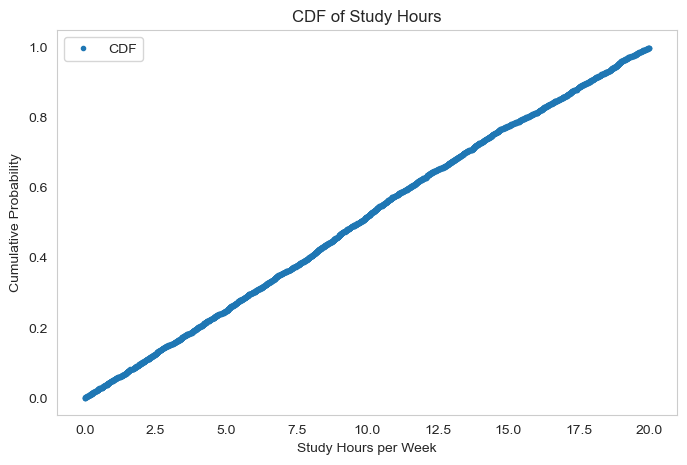

In [19]:
# Compute CDF for StudyTimeWeekly
study_hours_sorted = np.sort(data['StudyTimeWeekly'])
cdf = np.arange(1, len(study_hours_sorted) + 1) / len(study_hours_sorted)

# Plot CDF
plt.figure(figsize=(8,5))
plt.plot(study_hours_sorted, cdf, marker='o', linestyle='none', markersize=3, label="CDF")
plt.xlabel("Study Hours per Week")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Study Hours")
plt.grid()
plt.legend()
plt.show()

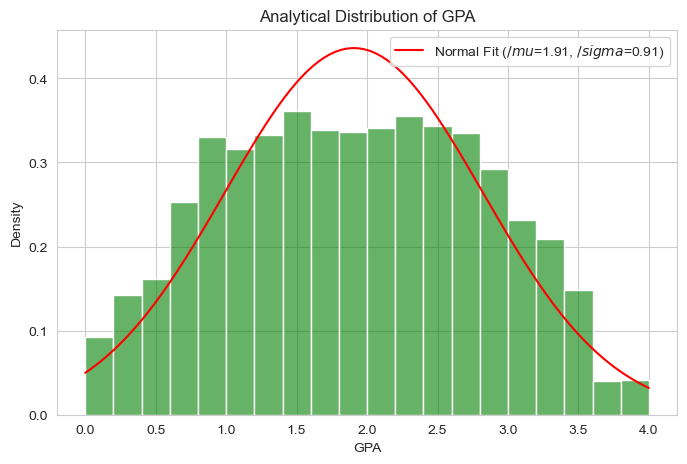

In [23]:
from scipy.stats import norm

# Fit a normal distribution to the GPA data
mu, sigma = norm.fit(data['GPA'])

# Generate x values for plotting
x = np.linspace(data['GPA'].min(), data['GPA'].max(), 100)
pdf = norm.pdf(x, mu, sigma)

# Plot histogram with normal distribution fit
plt.figure(figsize=(8,5))
sns.histplot(data['GPA'], bins=20, kde=False, stat="density", alpha=0.6, color='g')
plt.plot(x, pdf, 'r-', label=f'Normal Fit ($/mu$={mu:.2f}, $/sigma$={sigma:.2f})')
plt.title("Analytical Distribution of GPA")
plt.xlabel("GPA")
plt.ylabel("Density")
plt.legend()
plt.show()

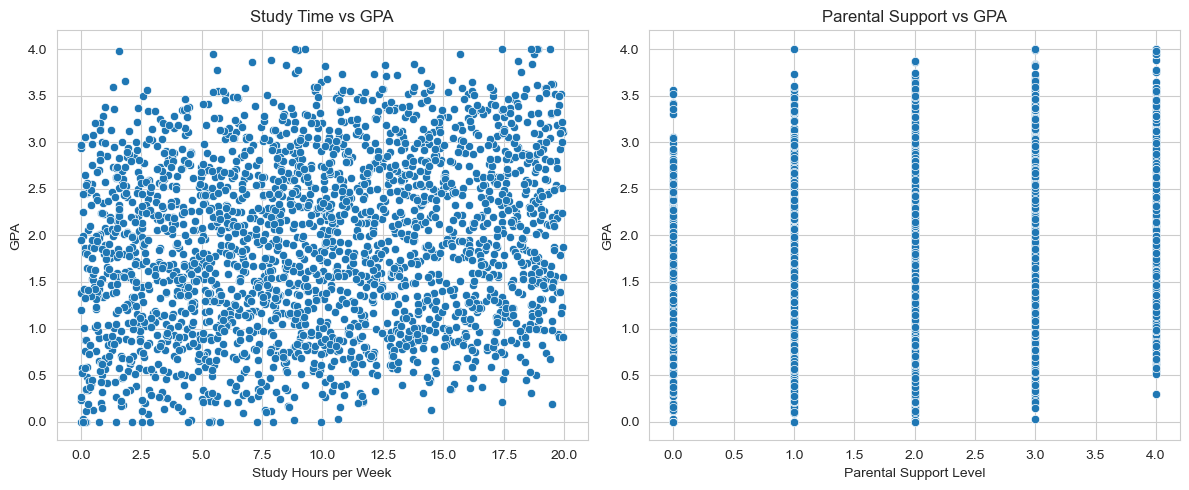

In [25]:
# Create scatter plots for correlation analysis
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# StudyTimeWeekly vs GPA
sns.scatterplot(x=data['StudyTimeWeekly'], y=data['GPA'], ax=axes[0])
axes[0].set_title("Study Time vs GPA")
axes[0].set_xlabel("Study Hours per Week")
axes[0].set_ylabel("GPA")

# ParentalSupport vs GPA
sns.scatterplot(x=data['ParentalSupport'], y=data['GPA'], ax=axes[1])
axes[1].set_title("Parental Support vs GPA")
axes[1].set_xlabel("Parental Support Level")
axes[1].set_ylabel("GPA")

plt.tight_layout()
plt.show()


In [27]:
from statsmodels.stats.weightstats import ttest_ind

# Perform a t-test comparing GPA of high vs low attendance students
stat, p_value, _ = ttest_ind(high_attendance, low_attendance, usevar='unequal')

# Display results
stat, p_value


(64.37171322595243, 0.0)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = data[['StudyTimeWeekly', 'Absences', 'ParentalEducation', 'ParentalSupport']]
y = data['GPA']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
coefficients = model.coef_

r2, mse, coefficients


(0.9182381215930386,
 0.06761156383918773,
 array([ 0.02985353, -0.09935934, -0.00158074,  0.14925826]))